# Project 2 Part 2

In [33]:
#Full Name: Hannah Ploutz

## Project Overview

### Goals

Using the approved dataset you proposed for project 2 part 1 last week, you will clean and explore the data set.

### Tasks

To meet the requirements for this week you must have:

- [X] Deleted unnecessary columns.
- [X] Deleted duplicate rows.
- [X] Identified and addressed missing values.
- [X] Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).
- [X] Produced univariate visuals for the target and all features.
- [X] Identified outliers.
- [X] Clearly commented all of your cleaning steps and described any decisions you made.
- [X] Commit your file to your Github repository and submit the link below.

### Data Dictionary

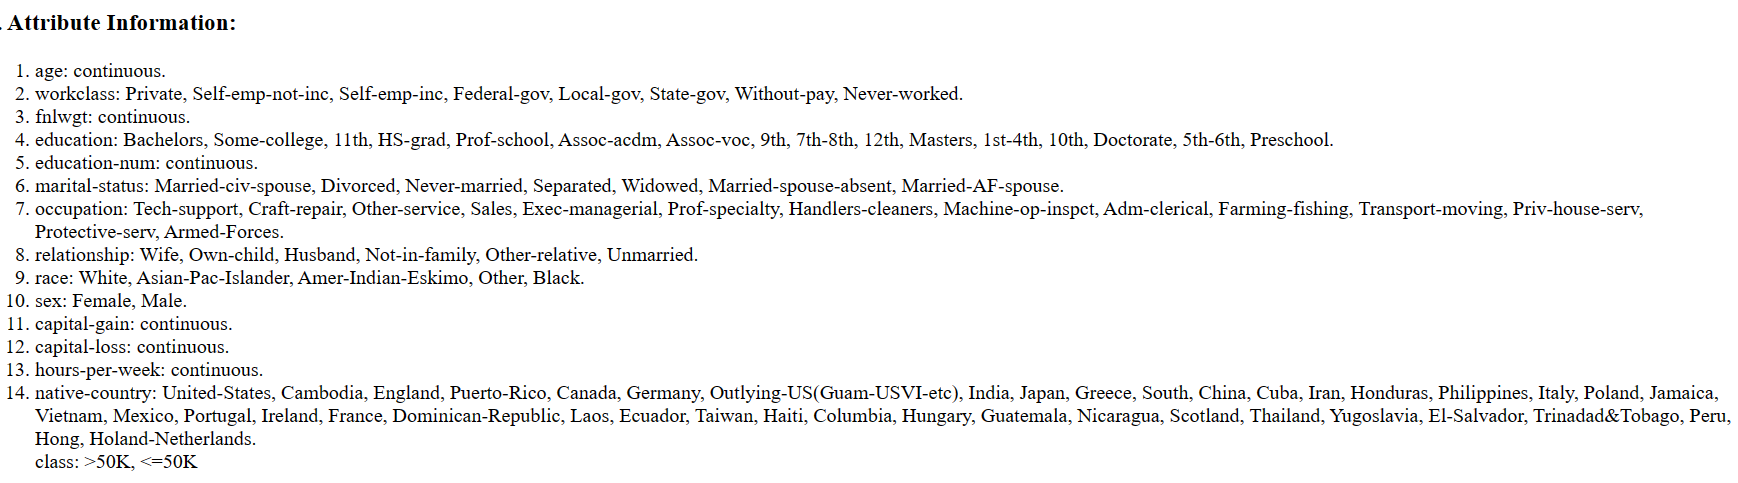

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Inspect the Data

In [2]:
## Load the data
path = 'C:/Users/hgplo/iCloudDrive/Programming/Coding Dojo/Course 2/Project 2/adult.csv'
adult = pd.read_csv(path)

In [3]:
## Display the first (5) rows of the dataframe
adult.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [4]:
## Display the number of rows and columns for the dataframe
adult.shape
print(f'There are {adult.shape[0]} rows, and {adult.shape[1]} columns.')

There are 48842 rows, and 15 columns.


In [5]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [6]:
#Datatypes of each variable in the data set
data_types = adult.dtypes
object_data_types = (data_types == "object").sum()
int_data_types = (data_types == "int64").sum()

print(f'There are {object_data_types} object columns and {int_data_types} integer columns')

There are 9 object columns and 6 integer columns


Upon initial inspection of the data, I will be deleting three columns. The first is fnlwgt, the second is Education and the third is relationship. 
- **"Fnlgwt"** This shows the number of units in the target population that the responding unit represents, 
> - which can vary due to it being a weight assigned by the Census Bureau
- **"Education"** is already represented in the educational_num column with the total number of years of education completed
- **"Relationship"** is already represented in the marital status column

## Clean the Data

**Delete Unnecessary Columns**

In [7]:
#dropping the columns outlined above from the dataframe
adult = adult.drop(['fnlwgt', 'education','relationship'], axis=1)

In [8]:
#confirming columns have been dropped using df.info to view all the columns and types
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   educational-num  48842 non-null  int64 
 3   marital-status   48842 non-null  object
 4   occupation       48842 non-null  object
 5   race             48842 non-null  object
 6   gender           48842 non-null  object
 7   capital-gain     48842 non-null  int64 
 8   capital-loss     48842 non-null  int64 
 9   hours-per-week   48842 non-null  int64 
 10  native-country   48842 non-null  object
 11  income           48842 non-null  object
dtypes: int64(5), object(7)
memory usage: 4.5+ MB


**Delete Duplicated Rows**

In [9]:
#Checking the dataframe for duplicates
adult.duplicated().sum()

7916

In [10]:
#dropping duplicate rows
adult.drop_duplicates(inplace=True)

In [11]:
#confirming duplicate rows have been dropped
adult.duplicated().sum()

0

**Address Missing Values**

In [12]:
#Looking at count of missing values by column
#There are no missing values in this dataframe
print(adult.isna().sum())

age                0
workclass          0
educational-num    0
marital-status     0
occupation         0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


`Upon further investigation below, there are missing values that will be adjusted so they can be displayed properly`

 **Identify and correct inconsistencies in data for categorical values**

In [13]:
#Create a variable to house the newly updated datatype for the dataframe, and a new object filter
data_types_new = adult.dtypes
object_data_types_new = (data_types == "object")

In [14]:
#Create variable that houses columns that are object types (categorical variables)
object_data_types_filter = data_types_new[(data_types == "object")]
object_data_types_filter

workclass         object
marital-status    object
occupation        object
race              object
gender            object
native-country    object
income            object
dtype: object

In [15]:
#Index of the the filter created in the previous step
object_data_types_filter.index

Index(['workclass', 'marital-status', 'occupation', 'race', 'gender',
       'native-country', 'income'],
      dtype='object')

`Looking at the following unique values for the object columns, I noticed that there are indeed missing values, indicated with  '?'.` <br>
`I will replace those values with "nan" so that they can be properly addressed later when preparing for machine learning`

In [16]:
#For loop to loop through the index of the object columns and display the unique values in each
for column in object_data_types_filter.index:
    print(column)
    print(adult[column].unique())
    print('\n')

workclass
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']


marital-status
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']


occupation
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']


race
['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']


gender
['Male' 'Female']


native-country
['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India' 'Cambodia'
 'Poland' 'Laos' 'England' 'Cuba' 'Taiwan' 'Italy' 'Canada' 'Portugal'
 'China' 'Nicaragua' 'Honduras' 'Iran' 'Scotland' 'Jamaica' 'Ecuador'
 'Yugoslavia' '

In [17]:
#replace all ? values in the dataframe with the numpy NaN value
adult.replace('?', np.nan, inplace=True)

In [18]:
#Printing the missing values now that they can be seen
print(adult.isna().sum())

age                   0
workclass          2324
educational-num       0
marital-status        0
occupation         2334
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      850
income                0
dtype: int64


In [19]:
#% of missing values per column
print(adult.isna().sum()/len(adult)*100)

age                0.000000
workclass          5.678542
educational-num    0.000000
marital-status     0.000000
occupation         5.702976
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     2.076919
income             0.000000
dtype: float64


`The rest of the categorical columns look good, no need to adjust any typos`

**Identify outliers**

In [20]:
#Numerical statistics for all the numerical columns
adult.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,40926.000000,40926.000000,40926.000000,40926.000000,40926.000000
mean,39.871549,10.105068,1272.336998,103.572790,40.747520
std,13.757406,2.689940,8075.900501,436.534106,13.035402
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,29.000000,9.000000,0.000000,0.000000,38.000000
50%,38.000000,10.000000,0.000000,0.000000,40.000000
75%,49.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


`Upon reviewing the numerical data, there doesn't appear to be any outliers or negative numbers`

## Univariate Visualization

**Produce univariate visuals for the target and all features.**

In [21]:
#Viewing the info from the dataframe to get the names of the columns
adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40926 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              40926 non-null  int64 
 1   workclass        38602 non-null  object
 2   educational-num  40926 non-null  int64 
 3   marital-status   40926 non-null  object
 4   occupation       38592 non-null  object
 5   race             40926 non-null  object
 6   gender           40926 non-null  object
 7   capital-gain     40926 non-null  int64 
 8   capital-loss     40926 non-null  int64 
 9   hours-per-week   40926 non-null  int64 
 10  native-country   40076 non-null  object
 11  income           40926 non-null  object
dtypes: int64(5), object(7)
memory usage: 4.1+ MB


### **Continuous Numeric Univariate Visuals**

**income v age**

Text(0.5, 1.0, 'Distribution of Age')

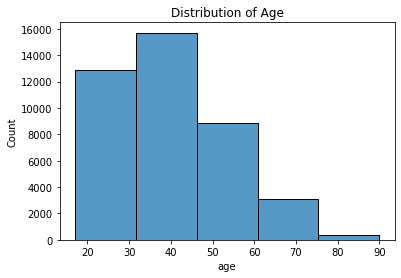

In [22]:
## Define a MatplotLib ax object using seaborn.histplot()
ax = sns.histplot(data=adult,
                  x='age',
                  bins=5)
## Set the Title
ax.set_title('Distribution of Age')

`After reviewing the above graph, there seems to be a higher distribution of income levels in age 20, 30 and 40,` <br>
`The highest amount of income level count is in between the ages of 30-40` <br>

**income v educational-num**

Text(0.5, 1.0, 'Distribution of Education Levels')

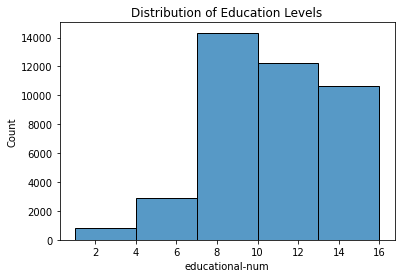

In [23]:
## Define a MatplotLib ax object using seaborn.histplot()
ax = sns.histplot(data=adult,
                  x='educational-num',
                  bins=5)
## Set the Title
ax.set_title('Distribution of Education Levels')

`After reviewing the above graph there is a higher distribution of income levels at 8 and 10 years of highest educational level achieved` <br>
`Some of the lowest distributions are 2 and 4 years` <br>

**income v capital gain**

Text(0.5, 1.0, 'Distribution of Capital Gain')

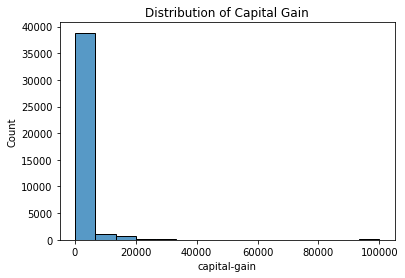

In [24]:
## Define a MatplotLib ax object using seaborn.histplot()
ax = sns.histplot(data=adult,
                  x='capital-gain',
                  bins=15)
## Set the Title
ax.set_title('Distribution of Capital Gain')

`After reviewing the above graph, there is a large amount of distribution of capital gain in the 0 - 5000 range for income levels` <br>

**income v capital loss**

Text(0.5, 1.0, 'Distribution of Capital Loss')

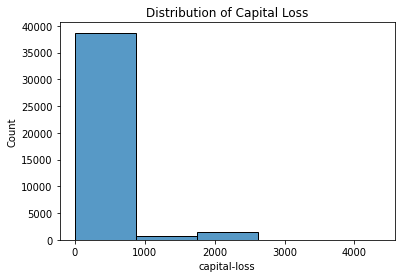

In [25]:
## Define a MatplotLib ax object using seaborn.histplot()
## Bins = 5
ax = sns.histplot(data=adult,
                  x='capital-loss',
                  bins=5)
## Set the Title
ax.set_title('Distribution of Capital Loss')

`After reviewing the above graph, there is a large amount of distribution of capital loss in the 0 to 9000 range` <br>

**income v hours-per-week**

Text(0.5, 1.0, 'Distribution of Hours Per Week')

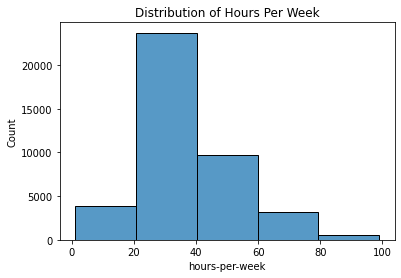

In [26]:
## Define a MatplotLib ax object using seaborn.histplot()
ax = sns.histplot(data=adult,
                  x='hours-per-week',
                  bins=5)
## Set the Title
ax.set_title('Distribution of Hours Per Week')

`After reviewing the above graph, there appears to be a greater amount of distribution of income levels between 20-30 hours per week` <br>

### **Categorical Univariate Visuals**

**income v workclass**

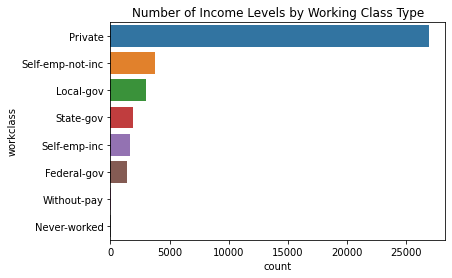

In [27]:
## Define the label order
label_order = adult['workclass'].value_counts().index

## Define a MatplotLib ax (plot) object using seaborn.countplot()
ax = sns.countplot(data=adult,
                   y='workclass',
                   order=label_order)

## Set the Title
ax.set_title('Number of Income Levels by Working Class Type');

`After reviewing this graph, it is clear that there is a very high count of income levels in the Private sector employees category` <br>

**income v marital-status**

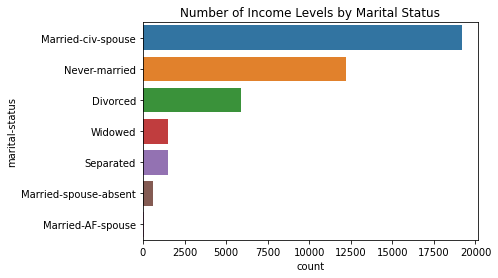

In [28]:
## Define the label order
label_order = adult['marital-status'].value_counts().index

## Define a MatplotLib ax (plot) object using seaborn.countplot()
ax = sns.countplot(data=adult,
                   y='marital-status',
                   order=label_order)

## Set the Title
ax.set_title('Number of Income Levels by Marital Status');

`After reviewing the above graph, there seems to be a large amount of income levels in Married-civ-spouse and` <br>
`Never-married categorys.` <br>

**income v occupation**

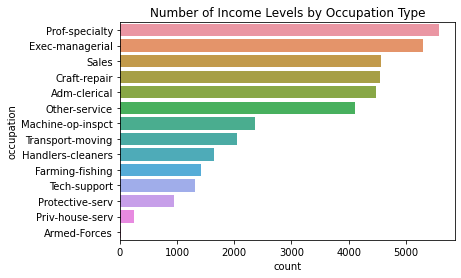

In [29]:
## Define the label order
label_order = adult['occupation'].value_counts().index

## Define a MatplotLib ax (plot) object using seaborn.countplot()
ax = sns.countplot(data=adult,
                   y='occupation',
                   order=label_order)

## Set the Title
ax.set_title('Number of Income Levels by Occupation Type');

`After reviewing this graph, there appears to be quite a large count of income levels in the Prof-speciality and Exec Management` <br>
`There is a moderate count of income levels in Sales, Craft-repair, Admin-clerical and Other Service` <br>
`While the least amount of counts are in the rest of the categories, with Armed Forces being the least with 0`

**income v race**

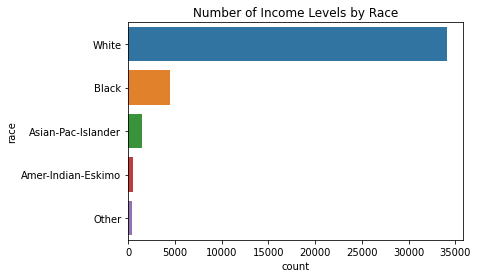

In [30]:
## Define the label order
label_order = adult['race'].value_counts().index

## Define a MatplotLib ax (plot) object using seaborn.countplot()
ax = sns.countplot(data=adult,
                   y='race',
                   order=label_order)

## Set the Title
ax.set_title('Number of Income Levels by Race');

`After reviewing this graph, it appears there is a larger distribution of income levels among those who have a White race.` <br>
`After that the count of income levels drop to very low levels`

**income v native country**

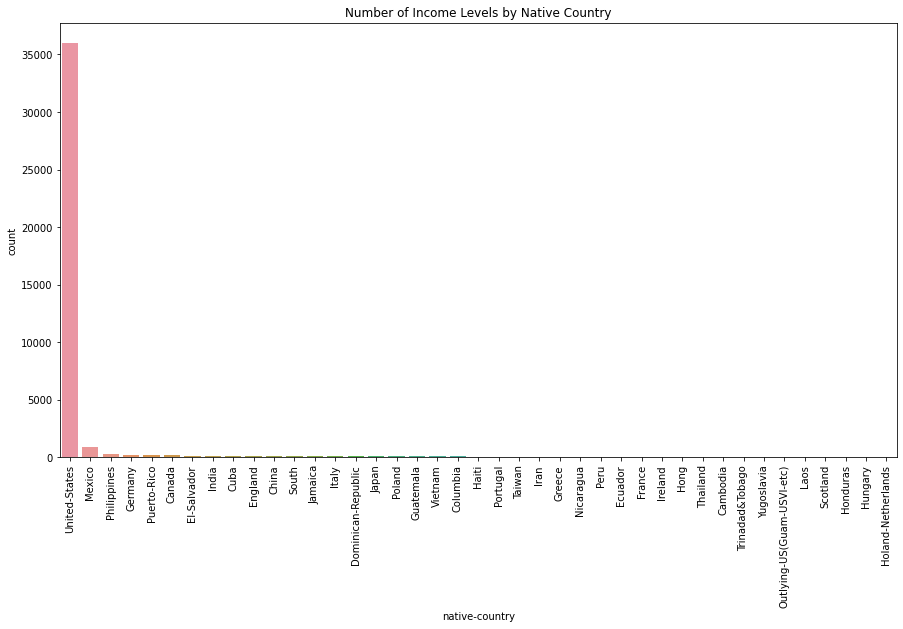

In [31]:
#set figure size to something bigger in order to see all the values
plt.figure(figsize=(15,8))

## Define the label order
label_order = adult['native-country'].value_counts().index

## Define a MatplotLib ax (plot) object using seaborn.countplot()
ax = sns.countplot(data=adult,
                   x='native-country',
                   order=label_order)
## Set the Title
ax.set_title('Number of Income Levels by Native Country')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

`^ Code source from` https://stackoverflow.com/questions/31594549/how-to-change-the-figure-size-of-a-seaborn-axes-or-figure-level-plot <br>
`^ Code source from` https://drawingfromdata.com/seaborn/matplotlib/visualization/rotate-axis-labels-matplotlib-seaborn.html 

`After reviewing the graph, it appears that there are a lot of data points for United States, but very few to none for other Countrys`

**income v gender**

Text(0.5, 1.0, 'Number of Income Levels by Gender')

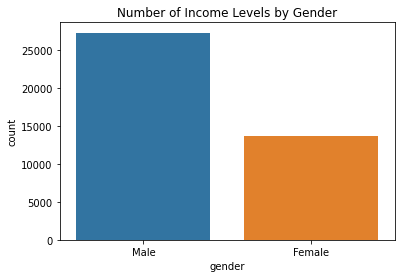

In [32]:
## Define the label order
label_order = adult['gender'].value_counts().index

## Define a MatplotLib ax (plot) object using seaborn.countplot()
ax = sns.countplot(data=adult,
                   x='gender',
                   order=label_order)
## Set the Title
ax.set_title('Number of Income Levels by Gender')

`After reviewing this graph, there is a larger count of income levels for Male and much less for Female genders` <br>